In [1]:
import numpy as np
import matplotlib.pyplot as plt

path_tot = "/home/emanuele/LOKI-DAS/tests/array_3d_tot.npy"
path_sta = "/home/emanuele/LOKI-DAS/tests/array_3d_sta.npy"
path_ch = "/home/emanuele/LOKI-DAS/tests/array_3d_fiber.npy"

In [2]:
corrmatrix_tot = np.load(path_tot)
corrmatrix_sta = np.load(path_sta)
corrmatrix_ch = np.load(path_ch)

In [3]:
print(corrmatrix_sta[0,2,30])

0.19400724528146931


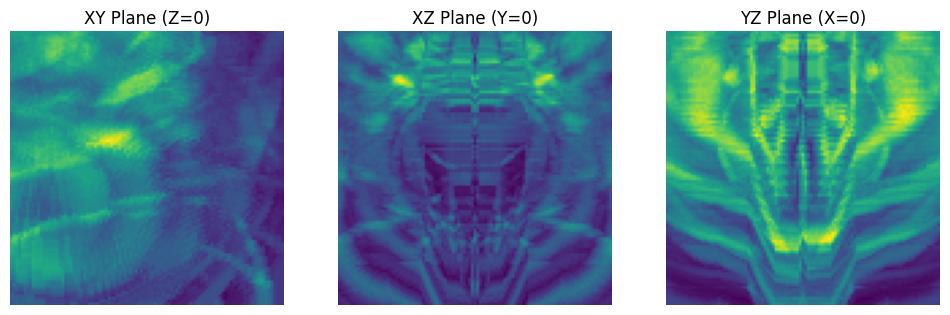

In [4]:

slice_xy = corrmatrix_sta[:, :, 0]  # Middle slice along Z-axis
slice_xz = corrmatrix_sta[:, 0, :]  # Middle slice along Y-axis
slice_yz = corrmatrix_sta[0, :, :]  # Middle slice along X-axis


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(slice_xy)
axes[0].set_title("XY Plane (Z=0)")


axes[1].imshow(slice_xz)
axes[1].set_title("XZ Plane (Y=0)")

axes[2].imshow(slice_yz)
axes[2].set_title("YZ Plane (X=0)")

for ax in axes:
    ax.axis("off")  # Hide axes for better visualization
    

plt.show()


In [5]:
import numpy as num

def coherence_plot(corrmatrix, xax, yax, zax, itrial, normalization=False):
    
    nx, ny, nz = num.shape(corrmatrix)
    CXY = num.zeros([ny, nx])
    for i in range(ny):
        for j in range(nx):
            CXY[i,j]=num.max(corrmatrix[j,i,:])

    CXZ = num.zeros([nz, nx])
    for i in range(nz):
        for j in range(nx):
            CXZ[i, j] = num.max(corrmatrix[j,:,i])

    CYZ = num.zeros([nz, ny])
    for i in range(nz):
        for j in range(ny):
            CYZ[i, j] = num.max(corrmatrix[:, j, i])

    if normalization:
        nrm = Normalize(vmin=0., vmax=1.)
    else:
        nrm = None


    xticks=num.min(xax)+num.arange(6)*(num.max(xax)-num.min(xax))/5
    yticks=num.min(yax)+num.arange(6)*(num.max(yax)-num.min(yax))/5
    zticks=num.min(zax)+num.arange(6)*(num.max(zax)-num.min(zax))/5

    fig, axs = plt.subplots(1,3, figsize=(15, 7.5))
    fig.suptitle('Coherence matrices trial '+str(itrial), fontsize=14, fontweight='bold')
    cmap = plt.cm.get_cmap('viridis', 100)

    ax1 = axs[0]
    cs1=ax1.contourf(xax, yax, CXY, 20, cmap=cmap, norm=nrm)
    ax1.set_xticks(xticks)
    ax1.set_yticks(yticks)
    ax1.set_xlabel('X (km)')
    ax1.set_ylabel('Y (km)')
    ax1.set_aspect('auto')
    
    ax2 = axs[1]
    cs2=ax2.contourf(yax, zax, CYZ, 20, cmap=cmap, norm=nrm)
    ax2.set_xticks(yticks)
    ax2.set_yticks(zticks)
    ax2.set_xlabel('Y (km)')
    ax2.set_ylabel('Z (km)')
    ax2.set_aspect('auto')
    ax2.invert_yaxis()

    ax3 = axs[2]
    cs3=ax3.contourf(xax, zax, CXZ, 20, cmap=cmap, norm=nrm)
    ax3.set_xticks(xticks)
    ax3.set_yticks(zticks)
    ax3.set_xlabel('X (km)')
    ax3.set_ylabel('Z (km)')
    ax3.set_aspect('auto')
    ax3.invert_yaxis()
    

    cbar=plt.colorbar(cs1, ax=axs, orientation='horizontal', shrink=0.6)
    cbar.set_label('Coherence')


    

In [6]:
num.shape(corrmatrix_sta)

(101, 101, 101)

101 101 101


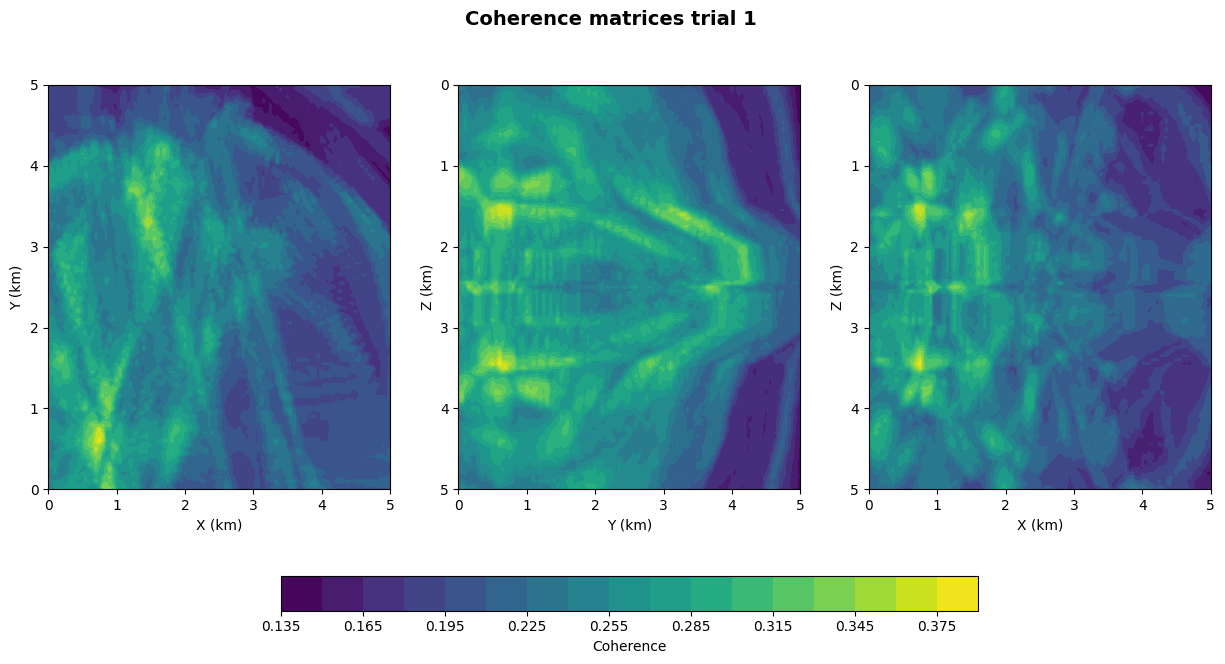

In [7]:
dx = 0.05
nx = 101
nz = 101
dz = 0.05

#nx, dx, nz, dz are referred to the diagonal of the domain 


x =  num.arange(0, (nx * dx) - (dx) , (dx))  #define the grid search based on the 2D traveltime grid
y =  num.arange(0, (nx * dx) - (dx), (dx))  #define the grid search based on the 2D traveltime grid
z =  num.arange(0, (nz * dz) - (dz), dz) #define the grid search based on the 2D traveltime grid

#x = (num.arange(0,nx)*dx)  #define the grid search based on the 2D traveltime grid
#y = (num.arange(0,nx)*dx)  #define the grid search based on the 2D traveltime grid (cateto della diagonale)
#z = (num.arange(0,nz)*dz)  

print(len(x),len(y),len(z))
coherence_plot(corrmatrix_sta, x, y, z, itrial=1)


In [8]:
print(x)

[0.         0.03535534 0.07071068 0.10606602 0.14142136 0.1767767
 0.21213203 0.24748737 0.28284271 0.31819805 0.35355339 0.38890873
 0.42426407 0.45961941 0.49497475 0.53033009 0.56568542 0.60104076
 0.6363961  0.67175144 0.70710678 0.74246212 0.77781746 0.8131728
 0.84852814 0.88388348 0.91923882 0.95459415 0.98994949 1.02530483
 1.06066017 1.09601551 1.13137085 1.16672619 1.20208153 1.23743687
 1.27279221 1.30814755 1.34350288 1.37885822 1.41421356 1.4495689
 1.48492424 1.52027958 1.55563492 1.59099026 1.6263456  1.66170094
 1.69705627 1.73241161 1.76776695 1.80312229 1.83847763 1.87383297
 1.90918831 1.94454365 1.97989899 2.01525433 2.05060967 2.085965
 2.12132034 2.15667568 2.19203102 2.22738636 2.2627417  2.29809704
 2.33345238 2.36880772 2.40416306 2.4395184  2.47487373 2.51022907
 2.54558441 2.58093975 2.61629509 2.65165043 2.68700577 2.72236111
 2.75771645 2.79307179 2.82842712 2.86378246 2.8991378  2.93449314
 2.96984848 3.00520382 3.04055916 3.0759145  3.11126984 3.14662518
